# Tutorial 2

## Q1) Row space, Column space, Null space, Rank, Basis, Gram-Schmidt Orthogonalization

In [2]:
import numpy as np
import sympy as sp
from sympy import Matrix
from sympy import *
from IPython.display import display, Math
init_printing(use_unicode=True)

### Matrix Representation of the equations

#### Variables

In [3]:
display(Math(r'[Q_{in}, Q_{1}, Q_{2}, Q_{3}, Q_{32}, Q_{43}, Q_{out}]^T'))

<IPython.core.display.Math object>

In [4]:
# Define the coefficient matrix A
A = Matrix([
    [-1, 1, 0, 0, 0, 0, 0],
    [0, 1, -1, 0, 1, 0, 0],
    [0, 0, 1, -1, -1, 1, 0],
    [0, 0, 0, 1, 0, -1, -1]
])


### Row Reduced Echelon Form 

In [4]:
# Compute the Row Reduced Echelon Form of the matrix
rref_matrix, pivot_columns = A.rref()
rref_matrix

⎡1  0  0  0  0   0   -1⎤
⎢                      ⎥
⎢0  1  0  0  0   0   -1⎥
⎢                      ⎥
⎢0  0  1  0  -1  0   -1⎥
⎢                      ⎥
⎣0  0  0  1  0   -1  -1⎦

### Spaces

In [5]:
row_space = A.rowspace()
column_space = A.columnspace()
null_space = A.nullspace()

In [6]:
row_space, column_space, null_space

⎛                                                                             
⎜                                                                             
⎜                                                                             
⎜                                                                             
⎜                                                                             
⎜                                                                             
⎜[[-1  1  0  0  0  0  0], [0  1  -1  0  1  0  0], [0  0  1  -1  -1  1  0], [0 
⎜                                                                             
⎜                                                                             
⎜                                                                             
⎜                                                                             
⎜                                                                             
⎝                                                   

### Gram Schmidt Orthogonalization

In [7]:
def gram_schmidt(vectors):
    orthonormal_vectors = []
    for v in vectors:
        for u in orthonormal_vectors:
            v -= (v @ u.T) / (u @ u.T) * u
        v = v / (v @ v.T) ** 0.5
        
        orthonormal_vectors.append(v)

    for i, el in enumerate(orthonormal_vectors):
        orthonormal_vectors[i] = el.tolist()
    return orthonormal_vectors

row_basis_vectors = np.array(row_space).squeeze()
orthonormal_row_vectors = gram_schmidt(row_basis_vectors)

print('Orthonormal row vectors:')
orthonormal_row_vectors_sp = Matrix(orthonormal_row_vectors)
orthonormal_row_vectors_sp

Orthonormal row vectors:


⎡-0.707106781186547  0.707106781186547          0                   0         
⎢                                                                             
⎢0.316227766016838   0.316227766016838  -0.632455532033676          0         
⎢                                                                             
⎢0.258198889747161   0.258198889747161  0.129099444873581   -0.645497224367903
⎢                                                                             
⎣0.288675134594813   0.288675134594813  0.144337567297406   0.144337567297406 

          0                   0                   0         ⎤
                                                            ⎥
  0.632455532033676           0                   0         ⎥
                                                            ⎥
  -0.129099444873581  0.645497224367903           0         ⎥
                                                            ⎥
  -0.144337567297406  -0.144337567297406  -0.866025403784438⎦

### Using QR Decomposition function directly

###### *QR decomposition not discussed, refer to working of the algorithm online

In [8]:
row_basis_vectors = np.array(row_space).squeeze()
Q, R = np.linalg.qr(row_basis_vectors.T)

orthonormal_vectors = Q.T

print("Orthonormal Vectors:")
print(orthonormal_vectors)


Orthonormal Vectors:
[[-0.70710678  0.70710678  0.          0.          0.          0.
   0.        ]
 [-0.31622777 -0.31622777  0.63245553 -0.         -0.63245553 -0.
  -0.        ]
 [-0.25819889 -0.25819889 -0.12909944  0.64549722  0.12909944 -0.64549722
  -0.        ]
 [-0.28867513 -0.28867513 -0.14433757 -0.14433757  0.14433757  0.14433757
   0.8660254 ]]


In [9]:
null_basis_vectors = np.array(null_space).squeeze()
orthonormal_null_vectors = gram_schmidt(null_basis_vectors)
print("Orthonormal Null Vectors:")

orthonormal_null_vectors = Matrix(orthonormal_row_vectors)
orthonormal_null_vectors

Orthonormal Null Vectors:


⎡-0.707106781186547  0.707106781186547          0                   0         
⎢                                                                             
⎢0.316227766016838   0.316227766016838  -0.632455532033676          0         
⎢                                                                             
⎢0.258198889747161   0.258198889747161  0.129099444873581   -0.645497224367903
⎢                                                                             
⎣0.288675134594813   0.288675134594813  0.144337567297406   0.144337567297406 

          0                   0                   0         ⎤
                                                            ⎥
  0.632455532033676           0                   0         ⎥
                                                            ⎥
  -0.129099444873581  0.645497224367903           0         ⎥
                                                            ⎥
  -0.144337567297406  -0.144337567297406  -0.866025403784438⎦

# Q2) Computing Inverse Explicitly vs Gauss Elimination

In [10]:
import time
from matplotlib import pyplot as plt

In [11]:
matrix_sizes = [10, 100, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]


In [21]:
inverse_then_multiply_times = []
direct_solve_times = []

for matrix_size in matrix_sizes:
    b = np.random.rand(matrix_size)
    matrix = np.random.rand(matrix_size, matrix_size)
    
    start_time = time.time()
    matrix_inverse = np.linalg.inv(matrix)
    solution = np.dot(matrix_inverse, b)
    end_time = time.time()

    inverse_then_multiply_times.append(end_time - start_time)

    start_time = time.time()
    solution = np.linalg.solve(matrix, b)
    end_time = time.time()

    direct_solve_times.append(end_time - start_time)


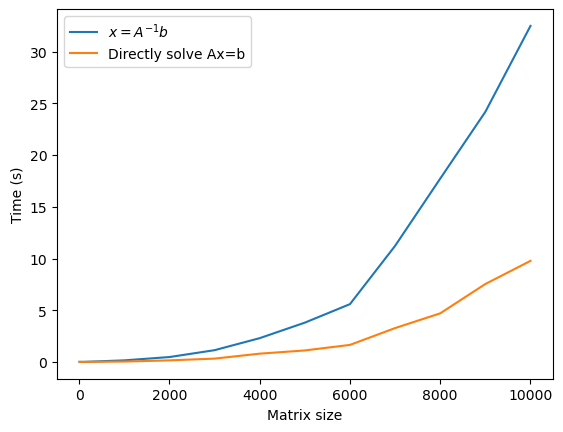

In [22]:
plt.plot(matrix_sizes, inverse_then_multiply_times, label=r'$x = A^{-1}b$')
plt.plot(matrix_sizes, direct_solve_times, label='Directly solve Ax=b')
plt.legend()
plt.xlabel('Matrix size')
plt.ylabel('Time (s)')
plt.show()

### Q3) Linear Regression

In [23]:
X_data, y_data= np.load('data.npz').values()


In [24]:
rank = np.linalg.matrix_rank(X_data)
print(f'Rank of the matrix: {rank}')

Rank of the matrix: 4000


In [25]:
augmented_matrix = np.hstack((X_data, y_data[:, None]))
rank_augmented = np.linalg.matrix_rank(augmented_matrix)
print(f'Rank of the augmented matrix: {rank_augmented}')

Rank of the augmented matrix: 4001


In [26]:
from IPython.display import display, Math
display(Math(r'\beta = \left(X^{T} X\right)^{-1} X^{T} y'))


<IPython.core.display.Math object>

In [27]:
# Compute the coefficients using the normal equation
XTX = X_data.T @ X_data
XTy = X_data.T @ y_data

In [28]:
XTX_inv = np.linalg.inv(XTX)
coefficients = XTX_inv @ XTy

In [29]:
solver_coefficients = np.linalg.solve(XTX, XTy)

In [ ]:
# true_coefficients = np.load('true_coefficients.npz')['true_coefficients']
# print('Deviation from true coefficients:', np.linalg.norm(coefficients - true_coefficients))


In [ ]:
# print('Deviation from true coefficients:', np.linalg.norm(solver_coefficients - true_coefficients))